In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

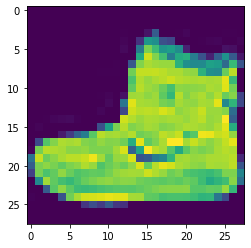

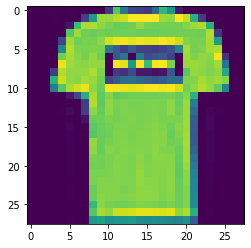

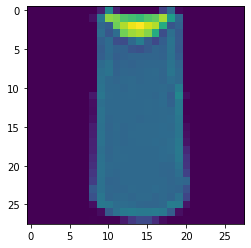

In [4]:
for img in train_images[:3]:
    plt.imshow(img)
    plt.show()

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [5]:
# i am building the model (our neural network) now

"""
flatten
[
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

becomes

[1,2,3,4,5,6,7,8,9]

"""

model = Sequential([
    layers.Flatten(input_shape=(28, 28)), # flatten 
    layers.Dense(1024),   # input layer
    layers.Dense(128),
    layers.Dense(10)        # output layer --> number must match NUMBER OF CLASSES (Labels)
    # number inside == number of types of predictions
        # predict 1 vs 0 --> 2
        # predict 0 vs 1 vs 2 --> 3
        # predict 0 vs 1 vs 2 vs 3 vs 4 --> 5
])

#copy pasted from documentation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# training the model
# epochs --> number of times we run through ENTIRE train dataset
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
 597/1875 [========>.....................] - ETA: 6s - loss: 157.4919 - accuracy: 0.6645

KeyboardInterrupt: 

In [7]:
# convolution neural network
# we usually use this for image processing

model = Sequential([
    layers.Conv2D(64, (4,4), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), # 2d to 1d
    layers.Dense(128, activation="relu"),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2825 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3600 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\amir_\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 2s 6ms/step - loss: 0.4747 - accuracy: 0.8908


(0.4747462272644043, 0.8907999992370605)

In [11]:
# model improvement

model = Sequential([
    layers.Conv2D(32, (4,4), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (4,4), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), # 2d to 1d
    layers.Dense(512, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5750 - accuracy: 0.8056
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3736 - accuracy: 0.8611
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3358 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3039 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2831 - accuracy: 0.8941


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 2s 4ms/step - loss: 0.3519 - accuracy: 0.8734


(0.35194647312164307, 0.8733999729156494)

In [14]:
# plus validation
from sklearn.model_selection import train_test_split

train_images2, val_images, train_labels2, val_labels = train_test_split(train_images, train_labels)
train_images2.shape, val_images.shape

((45000, 28, 28), (15000, 28, 28))

In [15]:
lousymodel = Sequential([
    layers.Flatten(input_shape=(28, 28)), # flatten 
    layers.Dense(1024),   # input layer
    layers.Dense(128),
    layers.Dense(10)        # output layer --> number must match NUMBER OF CLASSES
])

lousymodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

lousymodel.fit(train_images2, train_labels2, validation_data=(val_images, val_labels), epochs=5)

Epoch 1/5
1407/1407 [==============================] - 9s 6ms/step - loss: 38.4170 - accuracy: 0.7279 - val_loss: 12.4193 - val_accuracy: 0.7639
Epoch 2/5
1407/1407 [==============================] - 9s 6ms/step - loss: 8.0036 - accuracy: 0.7538 - val_loss: 2.6397 - val_accuracy: 0.8146
Epoch 3/5
1407/1407 [==============================] - 9s 6ms/step - loss: 2.8698 - accuracy: 0.7624 - val_loss: 3.5718 - val_accuracy: 0.7093
Epoch 4/5
1407/1407 [==============================] - 8s 6ms/step - loss: 2.8146 - accuracy: 0.7590 - val_loss: 3.3067 - val_accuracy: 0.7442
Epoch 5/5
1407/1407 [==============================] - 8s 6ms/step - loss: 3.1052 - accuracy: 0.7502 - val_loss: 4.7552 - val_accuracy: 0.7111
